## Download raw data

In [2]:
import requests

response = requests.get("""
    https://opendata.infrabel.be/api/explore/v2.1/catalog/datasets/nationale-stiptheid-per-maand/records?
    select=
        jaar AS year,
        maand AS month,
        tel AS trains,
        reg AS on_time,
        min_rt AS delay_minutes
    &order_by=month
    &limit=100
    &offset=10
    """)

raw_data = response.json()["results"]

In [3]:
raw_data

[{'year': '2016',
  'month': '2016-11',
  'trains': 99954,
  'on_time': 81913,
  'delay_minutes': 337994},
 {'year': '2016',
  'month': '2016-12',
  'trains': 107104,
  'on_time': 95568,
  'delay_minutes': 229134},
 {'year': '2017',
  'month': '2017-01',
  'trains': 107831,
  'on_time': 97822,
  'delay_minutes': 206171},
 {'year': '2017',
  'month': '2017-02',
  'trains': 99985,
  'on_time': 88998,
  'delay_minutes': 224076},
 {'year': '2017',
  'month': '2017-03',
  'trains': 112504,
  'on_time': 100688,
  'delay_minutes': 238126},
 {'year': '2017',
  'month': '2017-04',
  'trains': 99905,
  'on_time': 92468,
  'delay_minutes': 165001},
 {'year': '2017',
  'month': '2017-05',
  'trains': 109638,
  'on_time': 94896,
  'delay_minutes': 283128},
 {'year': '2017',
  'month': '2017-06',
  'trains': 106888,
  'on_time': 93292,
  'delay_minutes': 273664},
 {'year': '2017',
  'month': '2017-07',
  'trains': 102664,
  'on_time': 94664,
  'delay_minutes': 171279},
 {'year': '2017',
  'month': '

## Turn into a table

In [4]:
import pandas as pd

In [5]:
table = pd.DataFrame(raw_data)

In [6]:
table

,year,month,trains,on_time,delay_minutes
0,2016,2016-11,99954,81913,337994
1,2016,2016-12,107104,95568,229134
2,2017,2017-01,107831,97822,206171
3,2017,2017-02,99985,88998,224076
4,2017,2017-03,112504,100688,238126
...,...,...,...,...,...
95,2024,2024-10,119121,106599,252996
96,2024,2024-11,108383,95148,258772
97,2024,2024-12,115622,106117,197204
98,2025,2025-01,115021,105054,207661


In [7]:
table.dtypes

year             object
month            object
trains            int64
on_time           int64
delay_minutes     int64
dtype: object

## Calculate new features

In [8]:
# Create a date column (type of period/datetime)
table["date"] = pd.to_datetime(table['month'], format='%Y-%m')

In [9]:
table["month_name"] = table["date"].dt.month_name()

In [10]:
table["in_late"] = table['trains'] - table['on_time']

In [11]:
table["on_time_rate"] = (table['on_time'] / table['trains']) * 100

In [12]:
table["mean_delay_minutes"] = table['delay_minutes'] / table['in_late']

In [13]:
table

,year,month,trains,on_time,delay_minutes,date,month_name,in_late,on_time_rate,mean_delay_minutes
0,2016,2016-11,99954,81913,337994,2016-11-01,November,18041,81.950697,18.734771
1,2016,2016-12,107104,95568,229134,2016-12-01,December,11536,89.229160,19.862517
2,2017,2017-01,107831,97822,206171,2017-01-01,January,10009,90.717883,20.598561
3,2017,2017-02,99985,88998,224076,2017-02-01,February,10987,89.011352,20.394648
4,2017,2017-03,112504,100688,238126,2017-03-01,March,11816,89.497262,20.152844
...,...,...,...,...,...,...,...,...,...,...
95,2024,2024-10,119121,106599,252996,2024-10-01,October,12522,89.488000,20.204121
96,2024,2024-11,108383,95148,258772,2024-11-01,November,13235,87.788675,19.552097
97,2024,2024-12,115622,106117,197204,2024-12-01,December,9505,91.779246,20.747396
98,2025,2025-01,115021,105054,207661,2025-01-01,January,9967,91.334626,20.834855


In [14]:
table.dtypes

year                          object
month                         object
trains                         int64
on_time                        int64
delay_minutes                  int64
date                  datetime64[ns]
month_name                    object
in_late                        int64
on_time_rate                 float64
mean_delay_minutes           float64
dtype: object

In [15]:
table

,year,month,trains,on_time,delay_minutes,date,month_name,in_late,on_time_rate,mean_delay_minutes
0,2016,2016-11,99954,81913,337994,2016-11-01,November,18041,81.950697,18.734771
1,2016,2016-12,107104,95568,229134,2016-12-01,December,11536,89.229160,19.862517
2,2017,2017-01,107831,97822,206171,2017-01-01,January,10009,90.717883,20.598561
3,2017,2017-02,99985,88998,224076,2017-02-01,February,10987,89.011352,20.394648
4,2017,2017-03,112504,100688,238126,2017-03-01,March,11816,89.497262,20.152844
...,...,...,...,...,...,...,...,...,...,...
95,2024,2024-10,119121,106599,252996,2024-10-01,October,12522,89.488000,20.204121
96,2024,2024-11,108383,95148,258772,2024-11-01,November,13235,87.788675,19.552097
97,2024,2024-12,115622,106117,197204,2024-12-01,December,9505,91.779246,20.747396
98,2025,2025-01,115021,105054,207661,2025-01-01,January,9967,91.334626,20.834855


## Plot visuals

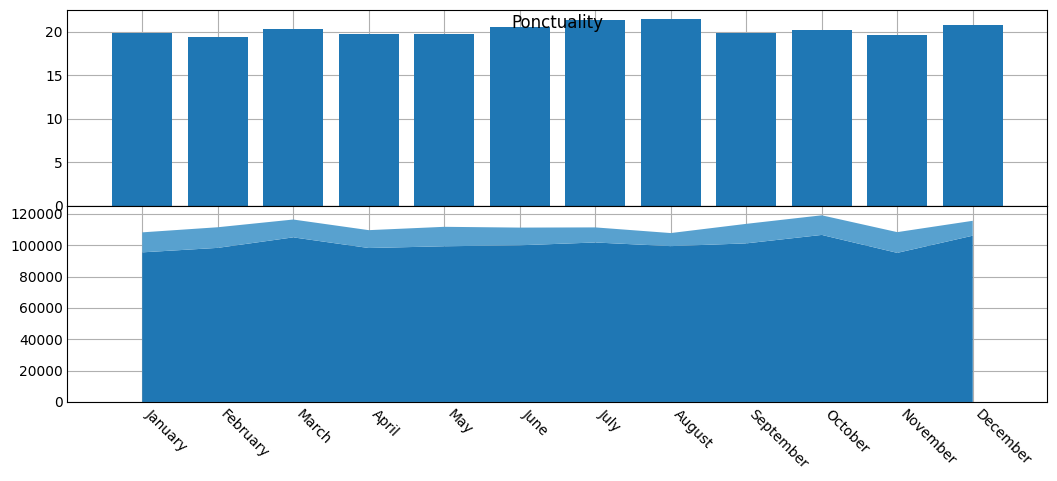

In [18]:
import matplotlib.pyplot as plt

# Filter
last_year = table[table['year'] == "2024"]

# Format
plt.style.use('_mpl-gallery')

fig = plt.figure(figsize=(10, 4))
fig.suptitle('Ponctuality')
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True)

axs[0].bar(
    last_year['month_name'],
    last_year['mean_delay_minutes']
)

# Plot
axs[1].stackplot(
    last_year['month_name'], 
    last_year['on_time'], 
    last_year['in_late']
)
plt.xticks(rotation=-45, ha="left")

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()
plt.show()